In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">ABSTRACT</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">INTRODUCTION</h1></center>
</div> 

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Background</h2></center>
</div> 

In an era where data-driven decisions are pivotal to success, political campaigns are no exception. Recognizing the power of big data analytics to shape political strategies, this project leverages the Global Database of Events, Language, and Tone (GDELT) to extract actionable insights for future political leaders in the Philippines. By harnessing GDELT's extensive repository of media events and sentiment analyses, the project aims to distill the most pressing issues and public sentiments across the country. This approach ensures that campaign platforms are not only relevant but also resonant with the electorate’s current concerns and needs.

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Problem Statement</h2></center>
</div> 

In the digital age, the proliferation of disinformation, particularly through orchestrated campaigns via "troll farms", has emerged as a critical challenge in political campaigning across the Philippines and Southeast Asia. These deceptive practices not only distort public perceptions but also undermine the integrity of democratic processes by swaying voter opinions with false narratives. The difficulty lies in the ability of political campaigns to both identify and counteract these disinformation efforts effectively while also promoting genuine and fact-based discourse.

This project seeks to address the urgent need for sophisticated data-driven strategies that can discern and mitigate the impact of digital disinformation. Utilizing the extensive monitoring capabilities of GDELT to track media events and sentiment, the study aims to equip political leaders with the tools to identify trends and anomalies in public discourse that may indicate the presence of disinformation. By establishing more transparent and factually accurate communication strategies, aspiring political leaders can enhance their campaign platforms, foster a more informed electorate, and strengthen democratic resilience against the corrosive effects of misinformation.

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Objectives</h2></center>
</div> 

The goal of this study is to delve deeper into the information provided generously through the GDELT Project and help assist leaders in pivoting their goals and strategies accordingly. 
The objectives of this is study are as follows: 
1. asdasd
2. asdasd
3. asdasd

<div id="data-sources-description" style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">DATA SOURCES AND DESCRIPTION</h1></center>
</div>

The **GDELT (Global Data of Events, Language, and Tone) Project** is a comprehensive global monitoring system that tracks news content from broadcasters, print media, and websites in numerous languages across almost every country in the world. It employs advanced techniques to identify and extract key elements driving global discourse and events, such as people, locations, organizations, topics, sources, sentiments, numerical data, quotations, images, and events. By continuously processing this immense stream of information on a second-by-second basis, GDELT generates a freely accessible open data platform that enables computational analysis of the world's events, narratives, and societal forces in real-time.

GDELT has several [datasets](https://www.gdeltproject.org/data.html). This study specifically uses the **Global Knowledge Graph** (GKG) dataset. GKG enables the representation of the underlying dimensions, geographic patterns, and network structures inherent in global news coverage. It uses sophisticated natural language processing algorithms to compute and encode a  range of codified metadata that captures the latent and contextual aspects of each document. In essence, the GKG interconnects every person, organization, location, numerical data, theme, news source, and event across the globe into a massive unified network. This network captures what is happening worldwide, the associated contexts and involved entities, as well as the sentiments surrounding these events, providing a daily comprehensive view of our global society.

The dataset has the following fields:

| Field Name                    | Description |
|-------------------------------|-------------|
| GKGRECORDID                   | Each GKG record is assigned a globally unique identifier in a date-oriented serial number format. |
| V2.1DATE                      | The publication date of the news media used to construct the GKG file, in YYYYMMDDHHMMSS format. |
| V2SOURCECOLLECTIONIDENTIFIER  | A numeric identifier specifying the source collection the document came from. |
| V2SOURCECOMMONNAME            | A human-friendly identifier of the source of the document. |
| V2DOCUMENTIDENTIFIER          | The unique external identifier for the source document. |
| V1COUNTS                      | A semicolon-delimited list of counts found in the document, each separated by the pound symbol. |
| V2.1COUNTS                    | Similar to V1COUNTS but includes character offsets for each count. |
| V1THEMES                      | A semicolon-delimited list of all themes found in the document. |
| V2ENHANCEDTHEMES              | Includes all GKG themes referenced in the document along with character offsets. |
| V1LOCATIONS                   | A semicolon-delimited list of all locations found in the text, extracted using the Leetaru algorithm. |
| V2ENHANCEDLOCATIONS           | Similar to V1LOCATIONS but includes an extra field for character offsets and additional details. |
| V1PERSONS                     | A semicolon-delimited list of all person names found in the text. |
| V2ENHANCEDPERSONS             | Includes all person names referenced in the document along with character offsets. |
| V1ORGANIZATIONS               | A semicolon-delimited list of all company and organization names found in the text. |
| V2ENHANCEDORGANIZATIONS       | Includes all organizations/companies referenced in the document along with character offsets. |
| V1.5TONE                      | A list of six core emotional dimensions, each recorded as a single precision floating point number. |
| V2.1ENHANCEDDATES             | Contains a list of all date references in the document, along with character offsets. |
| V2GCAM                        | The Global Content Analysis Measures field, runs an array of content analysis systems over each document. |
| V2.1SHARINGIMAGE              | Specifies a "sharing image" for each article as specified by news websites. |
| V2.1RELATEDIMAGES             | A list of URLs of images deemed most relevant to the core story of the article. |
| V2.1SOCIALIMAGEEMBEDS         | A list of URLs of image-based social media posts embedded in articles. |
| V2.1SOCIALVIDEOEMBEDS         | A list of URLs of videos embedded in articles from various platforms like YouTube, Vimeo, etc. |
| V2.1QUOTATIONS                | Extracts and segments all quoted statements from each article. |
| V2.1ALLNAMES                  | Contains a list of all proper names referenced in the document, along with character offsets. |
| V2.1AMOUNTS                   | Contains a list of all precise numeric amounts referenced in the document, along with character offsets. |
| V2.1TRANSLATIONINFO           | Records provenance information for machine translated documents. |
| V2EXTRASXML                   | Reserved to hold special non-standard data applicable to special subsets of the GDELT collection. |


The study extracted insights using these columns mainly: `V1COUNTS`, `V1THEMES`, `V1LOCATIONS`. Further information on `V1COUNTS` and `V1THEMES` are elaborated below:

**`V1COUNTS`**
- Sample: `["ARREST#400#political#4#Rossiya, Orenburgskaya Oblast', Russia#RS#RS55#52.4#54.9833#-2993111;"]`
- This is the value of the NAME field from the Category List spreadsheet indicating which category this count is of. At the time of this writing, this is most often` AFFECT`, `ARREST`, `KIDNAP`, `KILL`, `PROTEST`, `SEIZE`, or `WOUND`, though other categories may appear here as well in certain circumstances when they appear in context with one of these categories, or as other Count categories are added over time. A value of “PROTEST” in this field would indicate that this is a count of the number of protesters at a protest.
- Short description of the count types:
| Count Type | Description |
|------------|-------------|
| `AFFECT`     | This broad category captures everything from being sickened to refugees, evacuations, displaced persons, stranded, etc |
| `ARREST`     | Discussion of someone being arrested, detained, jailed, imprisoned, etc |
| `DISPLACED`  | This category counts mentions of people being displaced - see REFUGEES for counts of refugees, forced migration, and related |
| `EVACUATION` | Mentions of evacuations |
| `KIDNAP`     | Someone being kidnapped, abducted, hostages, etc |
| `KILL`       | Any mention of something dying |
| `PROTEST`   | Discussion of protesting, demonstrating, rioting, striking, activists, agitators, etc |
| `REFUGEES`   | Refugees, displaced persons, forced migration, asylum seekers |
| `SEIZE`      | Something being seized (often drugs, illegal materials, etc) |
| `SICKENED`   | This category counts anything being sickened |
| `WOUND`      | Any mention of something being wounded or injured |

**`V1THEMES`**
- Sample: `SELF_IDENTIFIED_HUMAN_RIGHTS;FREESPEECH;POLITICAL_PRISONER;PROTEST;MOVEMENT_GENERAL;`
- This is a [link](https://view.officeapps.live.com/op/view.aspx?src=http%3A%2F%2Fdata.gdeltproject.org%2Fdocumentation%2FGDELT-Global_Knowledge_Graph_CategoryList.xlsx&wdOrigin=BROWSELINK) to the description of the 284 themes in the dataset including the count types mentioned previously. However, this list is not exhaustive; some themes found in the dataset have no corresponding descriptions in the linked file and should be sourced externally. [This](https://blog.gdeltproject.org/crisislex-taxonomies-now-available-in-gkg/) is one example of such.
- Sample descriptions
| Theme                | Description |
|----------------------|-------------|
| `CORRUPTION`           | Corruption, kickbacks, embezzling, profiteering, etc |
| `CRIME_CARTELS`        | Primarily focused around mentions of drug cartels, drug corridors, etc. Does not currently have a list of cartels, just captures general discussion of them |
| `CRIME_COMMON_ROBBERY` | Discussion of general crime like pickpocketing, robbery, street criminals, etc |
| `CRIME_ILLEGAL_DRUGS`  | Mentions of illegal drugs |
| `CYBER_ATTACK`         | Any discussion of cyberwarfare, cyberattacks, phishing, hacking, hacktivists, viruses, etc |


<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">METHODOLOGY</h1></center>
</div> 

<b style='color:red'>Add date range and why—can be said that this is a prototype</b>

In [2]:
spark = (SparkSession
     .builder
     .master('local[*]') # Master URL;
     .getOrCreate())

In [3]:
df = spark.read.parquet("/home/msds2024/jsoliman/cpt1_shared/slt1a/bdcc"\
                            "/201610/parquets")

df_2015 = spark.read.parquet("/home/msds2024/jsoliman/cpt1_shared/slt1a/"\
                            "bdcc/201510/parquets")

The GKG (Global Knowledge Graph) dataset has a total of  2,087,088 rows, and looks like the following:

*Note: Due to the voluminous nature of big data, the sample dataframes will be displayed in their transposed form for the reader to clearly see the columns being referenced*.

In [4]:
print(f"The dataset has {df.count()} rows.")
display(df.limit(1).toPandas().transpose())

The dataset has 2087088 rows.


0
GKGRECORDID                                                    20161006153000-0
V2.1DATE                                                         20161006153000
V2SOURCECOLLECTIONIDENTIFIER                                                  2
V2SOURCECOMMONNAME                                               BBC Monitoring
V2DOCUMENTIDENTIFIER          Islamic Republic News Agency, Tehran/BBC Monit...
V1COUNTS                                                                   None
V2.1COUNTS                                                                 None
V1THEMES                      WB_2433_CONFLICT_AND_VIOLENCE;WB_2449_PARAMILI...
V2ENHANCEDTHEMES              WB_2433_CONFLICT_AND_VIOLENCE,44;WB_2449_PARAM...
V1LOCATIONS                                                                None
V2ENHANCEDLOCATIONS                                                        None
V1PERSONS                                                    abdolhossein imani
V2ENHANCEDPERSONS                                        Abdolhossein Imani,260
V1ORGANIZATIONS               iran basij paramilitary;islamic republic news ...
V2ENHANCEDORGANIZATIONS       Iran Basij Paramilitary,44;Islamic Republic Ne...
V1.5TONE                      -3.27868852459016,0.819672131147541,4.09836065...
V2.1ENHANCEDDATES                                                          None
V2GCAM                        wc:110,c12.1:4,c12.10:8,c12.12:4,c12.13:1,c12....
V2.1SHARINGIMAGE                                                           None
V2.1RELATEDIMAGES                                                          None
V2.1SOCIALIMAGEEMBEDS                                                      None
V2.1SOCIALVIDEOEMBEDS                                                      None
V2.1QUOTATIONS                                                             None
V2.1ALLNAMES                  Basij Paramilitary Force,52;Ila Bayt,85;Toward...
V2.1AMOUNTS                                                                None
V2.1TRANSLATIONINFO                                                        None
V2EXTRASXML                                                                None

Based on the [Data Sources and Description](#data-sources-description) section, we know that the GKG dataset has a nested or hierarchical structure where some columns contain multiple pieces of information separated by delimiters. This necessitates the need to denormalize or unnest these nested information elements to capture more comprehensive and granular insights.

In particular, we explode the following columns:
- `V1COUNTS`: To extract the count types (`KILL`, `ARREST`, `PROTEST`, etc.)
- `V1LOCATIONS`: To extract the region, country, longitude, and latitude
- `V1THEMES`: To extract all the themes of every discussion

The resulting dataframe after the explosion and removal of unneeded columns is as such:

In [5]:
df_final = (
    df.withColumn("CountType", F.regexp_extract(
        "V1COUNTS", r"^([^#]+)", 1)).withColumn(
            "ExpandedLocation",
            F.explode(
                F.split(
                    F.regexp_extract("V1LOCATIONS", r"(^|;)([^#]+#[^#]+#[^#]+)",
                                     0), ";")),
        ).withColumn(
            "ExtractedLocation",
            F.regexp_extract("ExpandedLocation", r"#([^#]+)#", 1)).withColumn(
                "Region",
                F.element_at(F.split(
                    F.col("ExtractedLocation"), ", "), 1)).withColumn(
                        "Country",
                        F.element_at(F.split(F.col("ExtractedLocation"), ", "),
                                     -1))  # Last element as Country
    .withColumn(
        "Region",
        F.when(F.col("Region") == F.col("Country"),
               None).otherwise(F.col("Region")),
    ).withColumn(
        "Themes_Single",
        F.explode(F.split(F.regexp_extract("V1THEMES", r"([^;]+)", 0), ";")),
    ).drop(
        "ExpandedLocation",
        "ExtractedLocation",
        "GKGRECORDID",
        "V2.1DATE",
        "V2.1ENHANCEDDATES",
        "V2GCAM",
        "V2.1SHARINGIMAGE",
        "V2.1RELATEDIMAGES",
        "V2.1SOCIALIMAGEEMBEDS",
        "V2.1SOCIALVIDEOEMBEDS",
        "V2.1QUOTATIONS",
        "V2.1ALLNAMES",
        "V2.1AMOUNTS",
        "V2.1TRANSLATIONINFO",
        "V2EXTRASXML",
    ))

df_final_2015 = (
    df_2015.withColumn("CountType", F.regexp_extract(
        "V1COUNTS", r"^([^#]+)", 1)).withColumn(
            "ExpandedLocation",
            F.explode(
                F.split(
                    F.regexp_extract("V1LOCATIONS", r"(^|;)([^#]+#[^#]+#[^#]+)",
                                     0), ";")),
        ).withColumn(
            "ExtractedLocation",
            F.regexp_extract("ExpandedLocation", r"#([^#]+)#", 1)).withColumn(
                "Region",
                F.element_at(F.split(
                    F.col("ExtractedLocation"), ", "), 1)).withColumn(
                        "Country",
                        F.element_at(F.split(F.col("ExtractedLocation"), ", "),
                                     -1))  # Last element as Country
    .withColumn(
        "Region",
        F.when(F.col("Region") == F.col("Country"),
               None).otherwise(F.col("Region")),
    ).withColumn(
        "Themes_Single",
        F.explode(F.split(F.regexp_extract("V1THEMES", r"([^;]+)", 0), ";")),
    ).drop(
        "ExpandedLocation",
        "ExtractedLocation",
        "GKGRECORDID",
        "V2.1DATE",
        "V2.1COUNTS",
        "V1ORGANIZATIONS",
        "V2.1ENHANCEDDATES",
        "V2GCAM",
        "V2.1SHARINGIMAGE",
        "V2.1RELATEDIMAGES",
        "V2.1SOCIALIMAGEEMBEDS",
        "V2.1SOCIALVIDEOEMBEDS",
        "V2.1QUOTATIONS",
        "V2.1ALLNAMES",
        "V2.1AMOUNTS",
        "V2.1TRANSLATIONINFO",
        "V2EXTRASXML",
    ))

In [6]:
display(df_final.limit(1).toPandas().transpose())

0
V2SOURCECOLLECTIONIDENTIFIER                                                  2
V2SOURCECOMMONNAME                                               BBC Monitoring
V2DOCUMENTIDENTIFIER                                News/BBC Monitoring/(c) BBC
V1COUNTS                                                                   None
V2.1COUNTS                                                                 None
V1THEMES                      LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...
V2ENHANCEDTHEMES              TAX_FNCACT_CANDIDATES,564;TAX_FNCACT_JUDGES,61...
V1LOCATIONS                   4#Pretoria, Gauteng, South Africa#SF#SF06#-25....
V2ENHANCEDLOCATIONS           1#South Africans#SF#SF##-29#24#SF#592;4#Pretor...
V1PERSONS                     muvhango lukhaimane;thulisile madonsela;sharis...
V2ENHANCEDPERSONS             Muvhango Lukhaimane,698;Thulisile Madonsela,41...
V1ORGANIZATIONS               national assembly on;security agency;national ...
V2ENHANCEDORGANIZATIONS       National Assembly On,803;Security Agency,977;N...
V1.5TONE                      1.73160173160173,4.76190476190476,3.0303030303...
CountType                                                                  None
Region                                                                 Pretoria
Country                                                            South Africa
Themes_Single                                                            LEADER

Additionally, since our analysis focuses on the legacy of the Duterte Administration, we created separate dataframes: one consisting of discussions that occurred only in the Philippines, and another for its neighboring countries in Southeast Asia (SEA). This allows us to provide greater context and substance to any insights specific to the Philippines during this period by considering the regional dynamics and discussions in nearby countries.

These two dataframes are as follows:

In [7]:
df_ph = (df_final
         .filter(F.col('Country')
                 .rlike('Philippines')
                )
        )

df_ph_2015 = (df_final_2015
              .filter(F.col('Country')
                      .rlike('Philippines')
                     )
             )

# Filtering the DataFrame for SEA countries
sea_countries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia",
                 "Myanmar", "Singapore", "Thailand", "Vietnam",
                 "East Timor"]
df_sea = (df_final
          .filter(F.col('Country')
                  .isin(sea_countries))
         )

print("Dataframe of the Philippines:")
display(df_ph.limit(1).toPandas().transpose())
print("\nDataframe of the neighboring countries in SEA:")
display(df_sea.limit(1).toPandas().transpose())

Dataframe of the Philippines:


0
V2SOURCECOLLECTIONIDENTIFIER                                                  1
V2SOURCECOMMONNAME                                                 philstar.com
V2DOCUMENTIDENTIFIER          http://www.philstar.com/banking/2016/10/06/163...
V1COUNTS                                                                   None
V2.1COUNTS                                                                 None
V1THEMES                      TAX_FNCACT;TAX_FNCACT_AUTHOR;ECON_STOCKMARKET;...
V2ENHANCEDTHEMES              WB_678_DIGITAL_GOVERNMENT,2547;WB_652_ICT_APPL...
V1LOCATIONS                   4#Manila, Manila, Philippines#RP#RPD9#14.6042#...
V2ENHANCEDLOCATIONS           4#Manila, Manila, Philippines#RP#RPD9#24210#14...
V1PERSONS                          yiannos papadopoulos;carlo cruz;asia pacific
V2ENHANCEDPERSONS             Yiannos Papadopoulos,581;Carlo Cruz,1362;Asia ...
V1ORGANIZATIONS                                                            None
V2ENHANCEDORGANIZATIONS                                                    None
V1.5TONE                      3.93700787401575,4.7244094488189,0.78740157480...
CountType                                                                  None
Region                                                                   Manila
Country                                                             Philippines
Themes_Single                                                        TAX_FNCACT


Dataframe of the neighboring countries in SEA:


0
V2SOURCECOLLECTIONIDENTIFIER                                                  1
V2SOURCECOMMONNAME                                                  asiaone.com
V2DOCUMENTIDENTIFIER          http://forums.asiaone.com/showthread.php?s=8e5...
V1COUNTS                                                                   None
V2.1COUNTS                                                                 None
V1THEMES                      CRISISLEX_CRISISLEXREC;DEATH_PENALTY;TRIAL;EPU...
V2ENHANCEDTHEMES              DEATH_PENALTY,140;DEATH_PENALTY,220;DEATH_PENA...
V1LOCATIONS                                   1#Singapore#SN#SN#1.3667#103.8#SN
V2ENHANCEDLOCATIONS                      1#Singapore#SN#SN##1.3667#103.8#SN#404
V1PERSONS                                                                  None
V2ENHANCEDPERSONS                                                          None
V1ORGANIZATIONS                                    singapore press holdings ltd
V2ENHANCEDORGANIZATIONS                        Singapore Press Holdings Ltd,423
V1.5TONE                      -1.23456790123457,4.93827160493827,6.172839506...
CountType                                                                  None
Region                                                                     None
Country                                                               Singapore
Themes_Single                                            CRISISLEX_CRISISLEXREC

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">EXPLORATORY DATA ANALYSIS</h1></center>
</div> 

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">How many distinct counts were made for each type, such as kill, arrest, protest, etc. in the Philippines?</h3></center>
</div> 

The data paints a *potentially* concerning picture of the documents in the Philippines during the first week of October 2016, shortly after the new Duterte Administration took office in the Philippines. 

The most striking observation from the data is the extraordinarily high number of reports related to "KILL" events, which stands at 1,426. This suggests that there was a significant amount of coverage on killings or deaths during that particular week.

Other notable events reported include "ARREST" (438 reports), "KIDNAP" (207 reports), and "AFFECT" (200 reports), indicating a considerable emphasis on law enforcement actions, abductions, and incidents with broader impacts.
    
The plot also highlights reports of "WOUND" (73), "SEIZE" (49), "PROTEST" (31), and "EVACUATION" (4) events, suggesting instances of injuries, confiscations or raids, demonstrations, and displacements of people.

Additionally, there are isolated reports related to "SOC_POINTSOFINTEREST_JAIL" (2), "CRISISLEX_T03_DEAD" (1), and "POVERTY" (1), which could indicate discussions or mentions of incarceration facilities, crisis-related deaths, and issues of poverty, respectively.

In [8]:
result = (df_ph
          .filter(F.col("CountType").isNotNull())
          .groupBy("CountType")
          .count()
          .orderBy("count", ascending=False)
          .limit(5)
          .toPandas()
         )

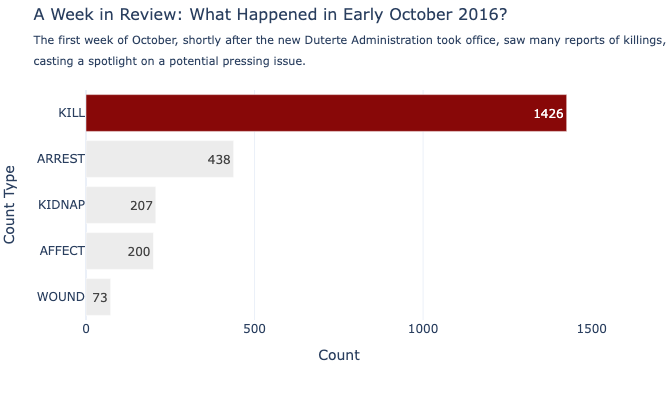

In [9]:
# Visualizing
# Extract the max count to highlight the corresponding bar
result_asc = result.sort_values(by="count", ascending=True)

# Extract the max count to highlight the corresponding bar
max_count = result_asc["count"].max()

# Define colors for each bar, highlighting the highest one
colors = ["#ECECEC" if count != max_count else '#880808'
          for count in result_asc["count"]]

# Initialize the figure
fig = go.Figure()

# Add a horizontal bar trace with dynamic colors
fig.add_trace(
    go.Bar(
        y=result_asc["CountType"],
        x=result_asc["count"],
        marker=dict(color=colors),
        text=result_asc["count"],
        orientation='h'
    )
)

# Set titles and labels
fig.update_layout(
    title=(
        "A Week in Review: What Happened in Early October 2016?<br>"
        "<sub>The first week of October, shortly after the new Duterte "
        "Administration took office, saw many reports of killings,<br>"
        "casting a spotlight on a potential pressing issue.</sub>"
    ),
    title_font_size=16,
    title_y=0.95,  # Adjust the title position downwards to create more space
    xaxis_title="Count",
    yaxis_title="Count Type",
    margin=dict(t=90),  # Increase the top margin to make room for the title
    width=900,
    height=400,
    template="plotly_white"
)

# Show the plot
fig.show()

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">How do the numbers compare to the corresponding counts from the same period in the previous year (2015)?</h3></center>
</div> 

However, associating the high number of "KILL"-related documents solely with the onset of the Duterte administration three months ago could be an oversimplification of the analysis. To avoid this potentially erroneous conclusion, it is imperative to conduct a temporal comparison and analyze the data from a broader perspective. In this case, we compared the data for the same time period (e.g., the first week of October) in 2015.

This establishes a baseline to help determine whether the observed magnitude in "KILL"-related documents three months after Duterte took office was an isolated incident or part of a broader trend.

In [10]:
result_2015 = (df_ph_2015
               .filter(F.col("CountType").isNotNull())
               .groupBy("CountType")
               .count()
               .orderBy("count", ascending=False)
               .limit(5)
               .toPandas()
              )

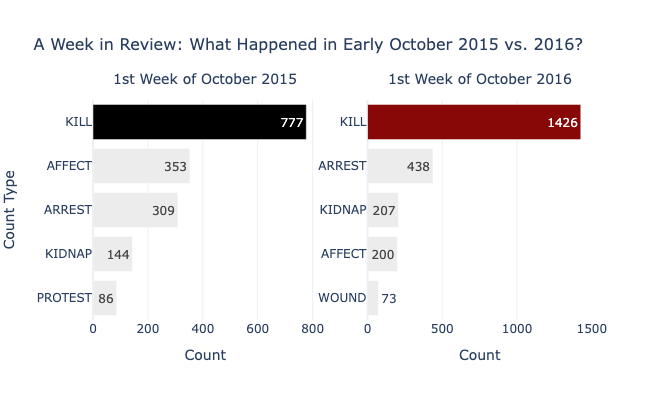

In [11]:
# Sorting and extracting the maximum count for 2015
result_asc_2015 = result_2015.sort_values(by="count", ascending=True)
max_count_2015 = result_asc_2015["count"].max()
colors_2015 = ["#ECECEC" if count != max_count_2015 else '#000000'
               for count in result_asc_2015["count"]]

# Sorting and extracting the maximum count for 2016
result_asc_2016 = result.sort_values(by="count", ascending=True)
max_count_2016 = result_asc_2016["count"].max()
colors_2016 = ["#ECECEC" if count != max_count_2016 else '#880808'
               for count in result_asc_2016["count"]]

# Creating a subplot with two plots side by side
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("1st Week of October 2015",
                                    "1st Week of October 2016"))

# Adding the 2015 bar chart to the first subplot
fig.add_trace(
    go.Bar(
        y=result_asc_2015["CountType"],
        x=result_asc_2015["count"],
        marker=dict(color=colors_2015),
        text=result_asc_2015["count"],
        orientation='h',
        showlegend=False
    ),
    row=1, col=1
)

# Adding the 2016 bar chart to the second subplot
fig.add_trace(
    go.Bar(
        y=result_asc_2016["CountType"],
        x=result_asc_2016["count"],
        marker=dict(color=colors_2016),
        text=result_asc_2016["count"],
        orientation='h',
        showlegend=False
    ),
    row=1, col=2
)

# Updating layout properties for both subplots
fig.update_layout(
    title="A Week in Review: What Happened in Early October 2015 vs. 2016?",
    title_font_size=16,
    xaxis_title="Count",
    yaxis_title="Count Type",
    width=1000,
    height=400,
    template="plotly_white",
    annotations=[
        {
            "font": {"size": 14},
            "x": 0.225,
            "y": 1.05,
            "showarrow": False,
            "text": "1st Week of October 2015",
            "xref": "paper", "yref": "paper"
        },
        {
            "font": {"size": 14},
            "x": 0.775,
            "y": 1.05,
            "showarrow": False,
            "text": "1st Week of October 2016",
            "xref": "paper", "yref": "paper"
        }
    ]
)

# Adjusting the subplot titles
fig.update_xaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Count", row=1, col=2)

# Display the combined plot
fig.show()

As it turns out, when compared to the same week of last year (2015), it can be observed that the <b style='color:#880808'>number of killings almost doubled</b> three months after the Duterte Administration began. The rise in the number of arrests could also be indicative of <b style='color:#880808'>more aggressive law enforcement</b> or changes in policing strategies.

Still, these possibilities are all that they are—possibilities. The GDELT Project describes the `KILL` count type as *any mention of something dying*. This renders our analysis limited and premature without more information on what the `KILL`-type documents, or any other type of documents, are about.

Lucky for us, the GKG dataset includes information on the themes of the article, and quite comprehensive too.

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">Which themes are associated with documents that have a <code>KILL</code> count type?</h3></center>
</div> 

In the dataset, one document could be tagged with several themes. For instance, consider this document sourced from the GKG dataset. It's filtered for occurrences in the Philippines and classified under the 'KILL' count type. 

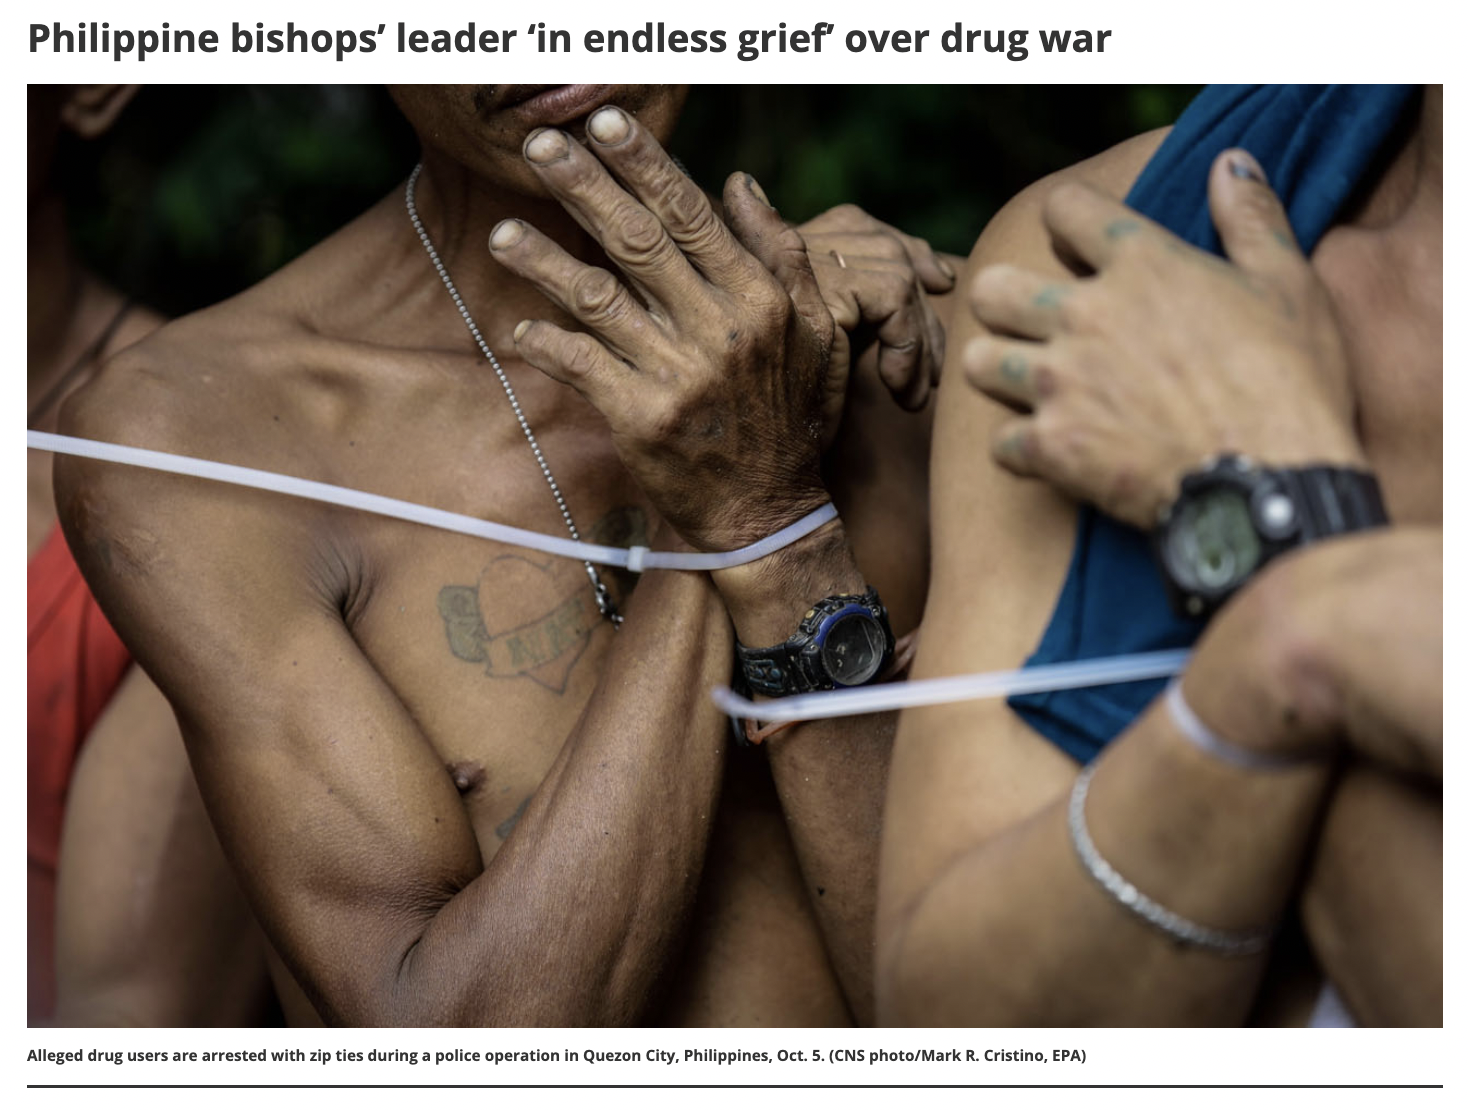


This document is tagged with themes such as:

    DRUG_TRADE;WB_1331_HEALTH_TECHNOLOGIES;WB_2453_ORGANIZED_CRIME;WB_1350_PHARMACEUTICALS;WB_2433_CONFLICT_AND_VIOLENCE;WB_621_HEALTH_NUTRITION_AND_POPULATION;WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE;WB_2456_DRUGS_AND_NARCOTICS;ARMEDCONFLICT;

Even without a detailed review of the article itself, it's clear that the primary focus is on drugs and violence. In fact, the predominant themes of "KILL"-related documents are:

In [12]:
result = (df_ph
          .filter((F.col('CountType') == 'KILL') &
                  (F.col('Country') == 'Philippines') &
                  (~F.col('Themes_Single').startswith('TAX')) &
                  (F.col('Themes_Single') != 'KILL')
                 )
          .groupBy('Themes_Single')
          .count()
          .orderBy('count', ascending=False)
          .limit(5)
          .toPandas()
         )
# result

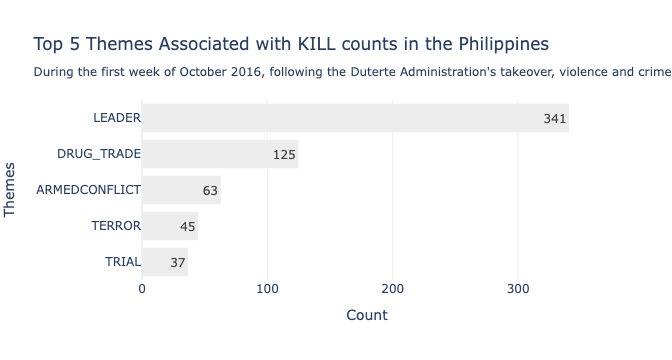

In [13]:
# Create the bar graph with Plotly in horizontal orientation
result_sorted = result.sort_values(by="count", ascending=True)
# Extract the max count to highlight the corresponding bar
max_count = result_sorted["count"].max()

# Define colors for each bar, highlighting the highest one
colors = ["#ECECEC" if count != max_count else '#880808'
          for count in result_asc["count"]]
fig = go.Figure(
    go.Bar(
        x=result_sorted['count'],  # Set the counts on the x-axis
        y=result_sorted['Themes_Single'],  # Set the themes on the y-axis
        text=result_sorted['count'],
        textposition='auto',
        orientation='h',  # Make the bar chart horizontal
        marker=dict(color=colors)  # You can customize the color here
    )
)

# Customize the layout
fig.update_layout(
    title=(
        "Top 5 Themes Associated with KILL counts in the Philippines<br>"
        "<sub>During the first week of October 2016, following the Duterte "
        "Administration's takeover, violence and crime themes were "
        "prominent</sub>"
    ),
    xaxis_title="Count",
    yaxis_title="Themes",
    template="plotly_white"
)

# Show the plot
fig.show()

Compared to 2015, there is a huge difference. This implies that...

In [14]:
result_2015 = (df_ph_2015
               .filter((F.col('CountType') == 'KILL') &
                       (F.col('Country') == 'Philippines') &
                       (~F.col('Themes_Single').startswith('TAX')) & 
                       (F.col('Themes_Single') != 'KILL')
                      )
               .groupBy('Themes_Single')
               .count()
               .orderBy('count', ascending=False)
               .limit(5)
               .toPandas()
              )
result_2015.sort_values(by='count', ascending=False, inplace=True)

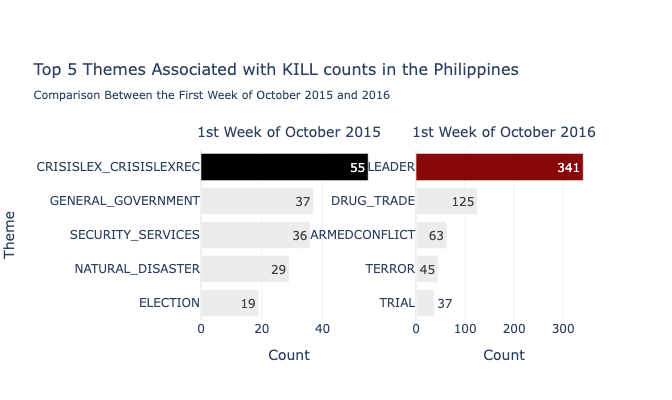

In [15]:
# Sorting and extracting the maximum count for 2015
result_asc_2015 = result_2015.sort_values(by="count", ascending=True)
max_count_2015 = result_asc_2015["count"].max()
colors_2015 = ["#ECECEC" if count != max_count_2015 else '#000000'
               for count in result_asc_2015["count"]]

# Sorting and extracting the maximum count for 2016
result_asc_2016 = result.sort_values(by="count", ascending=True)
max_count_2016 = result_asc_2016["count"].max()
colors_2016 = ["#ECECEC" if count != max_count_2016 else '#880808'
               for count in result_asc_2016["count"]]

# Creating a subplot with two plots side by side
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("1st Week of October 2015",
                                    "1st Week of October 2016"))

# Adding the 2015 bar chart to the first subplot
fig.add_trace(
    go.Bar(
        y=result_asc_2015["Themes_Single"],
        x=result_asc_2015["count"],
        marker=dict(color=colors_2015),
        text=result_asc_2015["count"],
        orientation='h',
        showlegend=False
    ),
    row=1, col=1
)

# Adding the 2016 bar chart to the second subplot
fig.add_trace(
    go.Bar(
        y=result_asc_2016["Themes_Single"],
        x=result_asc_2016["count"],
        marker=dict(color=colors_2016),
        text=result_asc_2016["count"],
        orientation='h',
        showlegend=False
    ),
    row=1, col=2
)

# Updating layout properties for both subplots
fig.update_layout(
    title="Top 5 Themes Associated with KILL counts in the "
          "Philippines<br>"
          "<sub>Comparison Between the First Week of October 2015 and "
          "2016</sub>",
    title_font_size=16,
    xaxis_title="Count",
    yaxis_title="Theme",
    margin=dict(t=150),
    width=1000,
    height=400,
    template="plotly_white",
    annotations=[
        {
            "font": {"size": 14},
            "x": 0.225,
            "y": 1.05,
            "showarrow": False,
            "text": "1st Week of October 2015",
            "xref": "paper", "yref": "paper"
        },
        {
            "font": {"size": 14},
            "x": 0.775,
            "y": 1.05,
            "showarrow": False,
            "text": "1st Week of October 2016",
            "xref": "paper", "yref": "paper"
        }
    ]
)

# Adjusting the subplot titles
fig.update_xaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Count", row=1, col=2)

# Display the combined plot
fig.show()

Our observations so far suggest that the nature of news and discussions in the Philippines drastically changed with the ascension of the Duterte Administration to power. 

But to further substantiate this interpretation, we have to paint a picture of the global landscape to determine whether this shift results from new political leadership or is simply a consequence of global trends.

For this purpose, we will narrow our focus to countries neighboring the Philippines, specifically in Southeast Asia.

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">more 2016 xxx</h3></center>
</div> 

In [16]:
sea_countries_ph = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia",
                 "Myanmar", "Singapore", "Thailand", "Vietnam",
                 "East Timor", "Philippines"]

df_sea_ph = (df_final
          .filter(F.col('Country').isin(sea_countries_ph))
         )

In [17]:
result = (df_ph
          .filter(F.col('CountType').isNotNull())
          .groupBy('CountType')
          .count()
          .orderBy('count', ascending=False)
          .toPandas()
         )

list_counttype_ph = result['CountType'].to_list()

dataframes = {}  # Dictionary to store DataFrames

for ct in list_counttype_ph:
    dataframes[ct] = df_sea_ph.filter(F.col('CountType').rlike(ct))

# Initialize a dictionary to hold the pandas DataFrames
pandas_dfs = {}

for ct, df in dataframes.items():
    # Applying the specified operations
    grouped_df = (df
                  .filter(F.col('Country').isNotNull())
                  .groupBy('Country')
                  .count()
                  .orderBy('count', ascending=False)
                 )
    # Store the resulting pandas DataFrame in the dictionary
    pandas_dfs[ct] = grouped_df

In [18]:
pandas_dfs

{'KILL': DataFrame[Country: string, count: bigint],
 'ARREST': DataFrame[Country: string, count: bigint],
 'KIDNAP': DataFrame[Country: string, count: bigint],
 'AFFECT': DataFrame[Country: string, count: bigint],
 'WOUND': DataFrame[Country: string, count: bigint],
 'SEIZE': DataFrame[Country: string, count: bigint],
 'PROTEST': DataFrame[Country: string, count: bigint],
 'EVACUATION': DataFrame[Country: string, count: bigint],
 'SOC_POINTSOFINTEREST_JAIL': DataFrame[Country: string, count: bigint],
 'CRISISLEX_T03_DEAD': DataFrame[Country: string, count: bigint],
 'POVERTY': DataFrame[Country: string, count: bigint]}

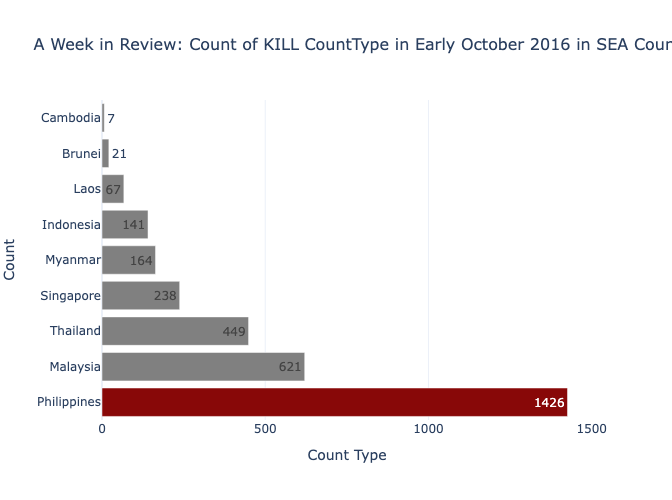

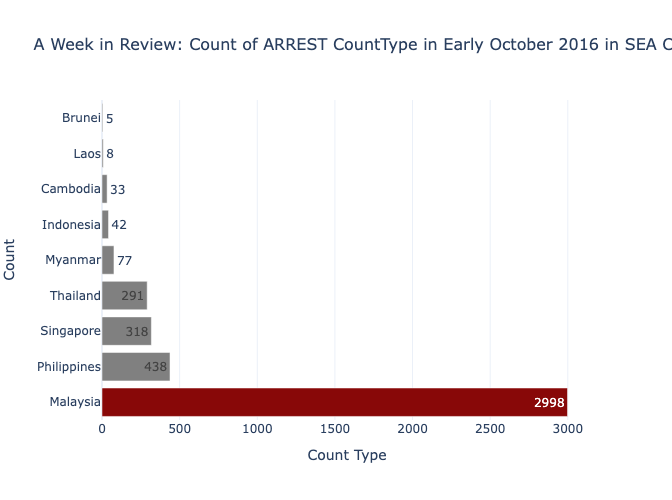

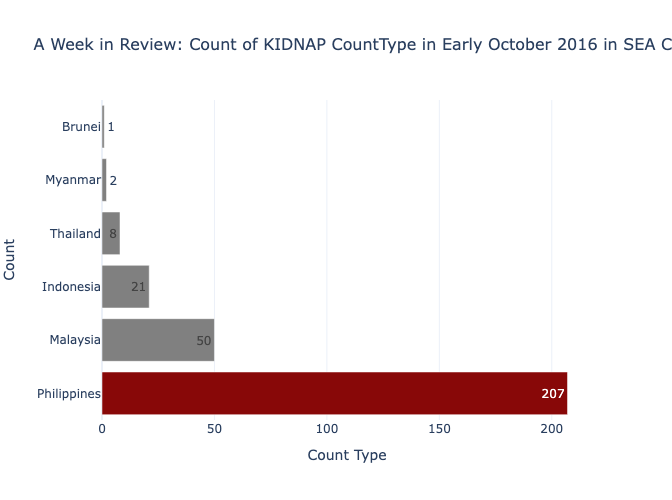

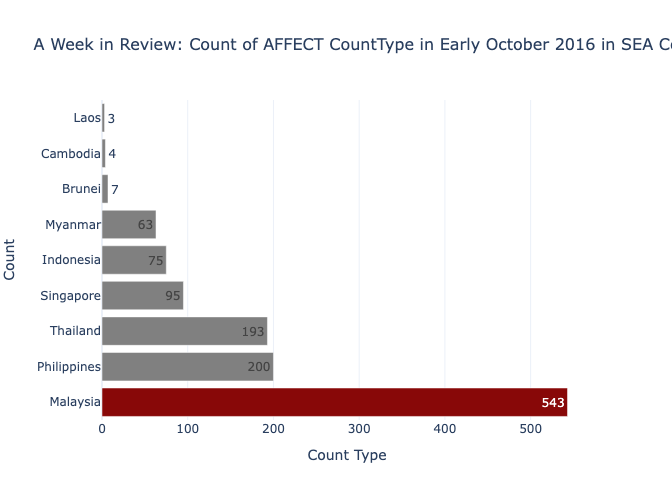

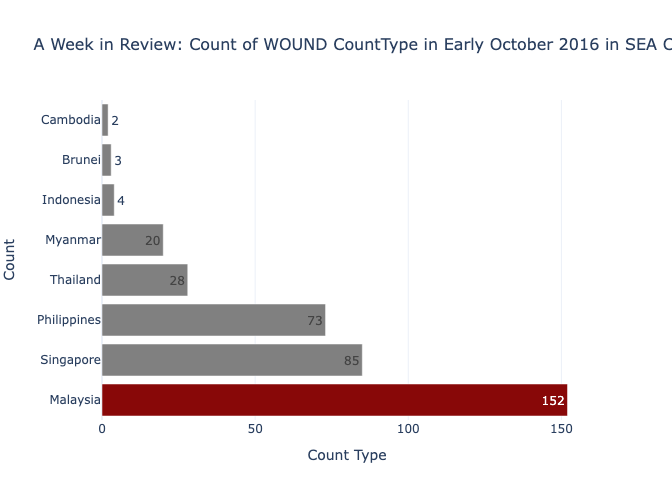

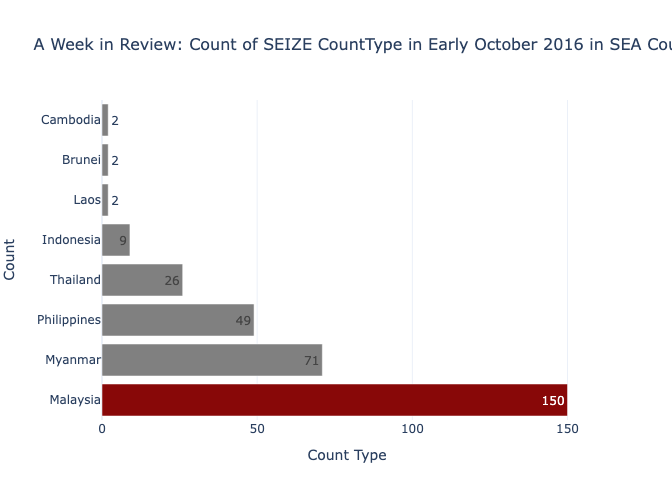

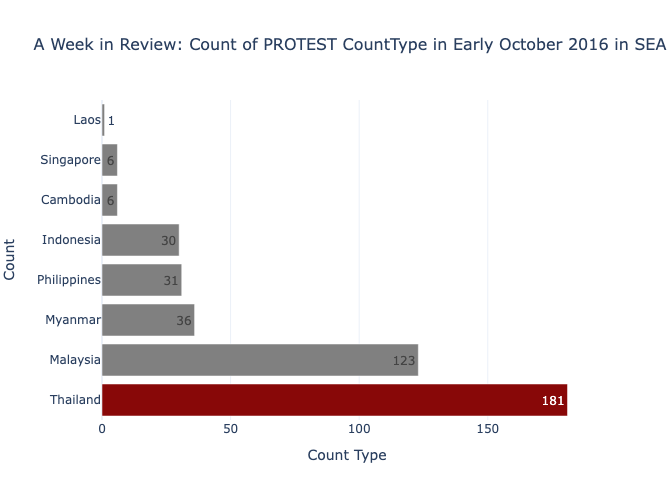

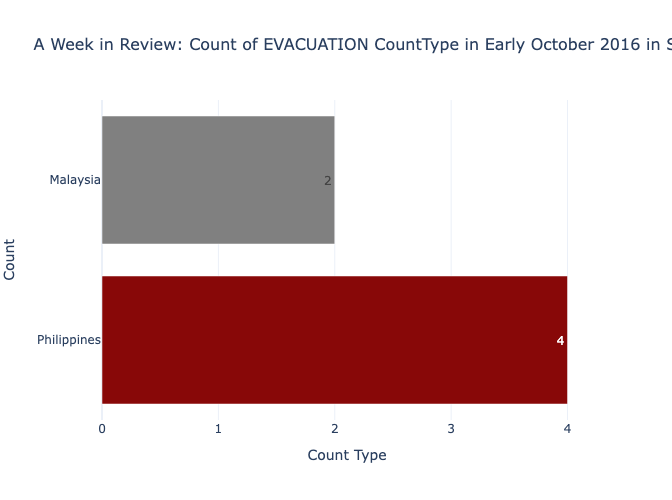

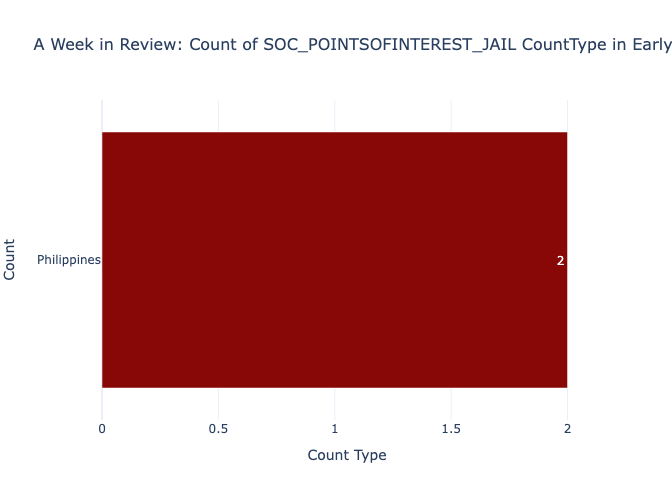

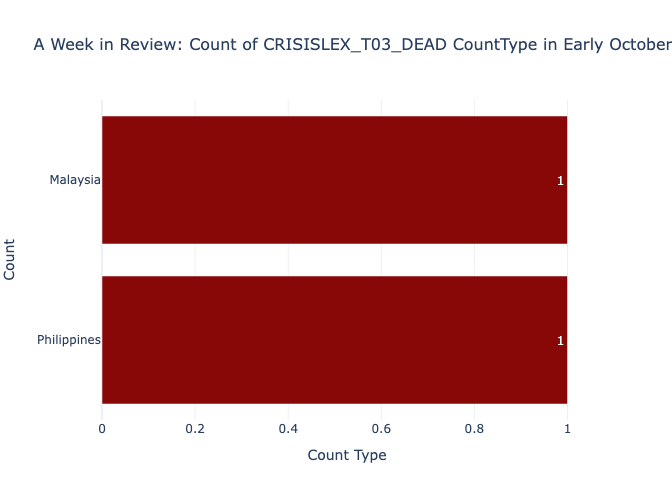

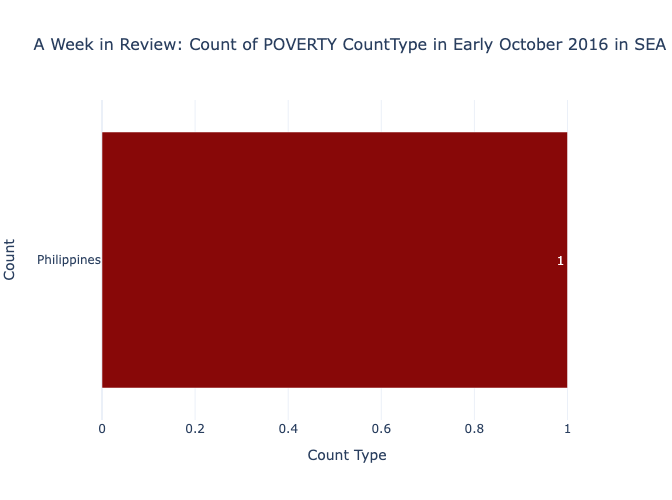

In [19]:
for i, j in pandas_dfs.items():
    result = j.toPandas()
    # Extract the max count to highlight the corresponding bar
    max_count = result['count'].max()
    
    # Define colors for each bar, highlighting the highest one
    colors = ['gray' if count != max_count else '#880808' for count in result['count']]
    
    # Initialize the figure
    fig = go.Figure()
    
    # Add a bar trace with dynamic colors
    fig.add_trace(go.Bar(
        x=result['count'],
        y=result['Country'],
        marker=dict(color=colors),
        text=result['count'],
        orientation='h',
        showlegend=False
    ))
    
    # Set titles and labels
    fig.update_layout(
         title=(f'A Week in Review: Count of {i} CountType in Early October 2016 in SEA Countries <br>'
               '<sub></sub>'),
        title_font_size=16,
        xaxis_title='Count Type',
        yaxis_title='Count',
        width=700 , height=500, template='plotly_white'
    )
    
    # Show the plot
    fig.show()

Out of all the different countries in SEA, Philippines ranked 1 for kill during this time period. Looking this in contrast to arrest, Philippines ranked number 2, while in Malaysia there were 2998 counts.


xxxxxx

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">more 2016 xxx</h3></center>
</div> 

In [20]:
from pyspark.sql.functions import col

# List of values to remove
themes_to_remove = [
    'TAX_CARTELS', 'TAX_DISEASE', 'TAX_ETHNICITY', 'TAX_FNCACT',
    'TAX_FOODSTAPLES', 'TAX_MILITARY_TITLE', 'TAX_POLITICAL_PARTY',
    'TAX_RELIGION', 'TAX_SPECIAL_ISSUES', 'TAX_SPECIALDEATH',
    'TAX_TERROR_GROUP', 'TAX_WEAPONS'
]

# Filter out rows where Themes_Single is in the list
df_sea_filt = df_sea.filter(~col('Themes_Single').startswith('TAX'))

# Show the result or convert to Pandas
df_sea_filt.limit(5).toPandas()

V2SOURCECOLLECTIONIDENTIFIER   V2SOURCECOMMONNAME  \
0                             1          asiaone.com   
1                             1             abc7.com   
2                             1  malaysiandigest.com   
3                             1          asiaone.com   
4                             1        sydneysun.com   

                                V2DOCUMENTIDENTIFIER  \
0  http://forums.asiaone.com/showthread.php?s=8e5...   
1  http://abc7.com/pets/kitten-rescued-from-the-1...   
2  http://malaysiandigest.com/frontpage/282-main-...   
3  http://forums.asiaone.com/member.php?s=8e54b29...   
4   http://www.sydneysun.com/index.php/sid/248308023   

                                            V1COUNTS  \
0                                               None   
1                                               None   
2                                               None   
3                                               None   
4  ARREST#9#Aussies face#4#Sydney, New South Wale...   

                                          V2.1COUNTS  \
0                                               None   
1                                               None   
2                                               None   
3                                               None   
4  ARREST#9#Aussies face#4#Sydney, New South Wale...   

                                            V1THEMES  \
0  CRISISLEX_CRISISLEXREC;DEATH_PENALTY;TRIAL;EPU...   
1  AFFECT;MANMADE_DISASTER_IMPLIED;WB_2024_ANTI_C...   
2  TRIAL;TAX_FNCACT;TAX_FNCACT_ATTORNEY;TAX_FNCAC...   
3  EPU_CATS_REGULATION;WB_678_DIGITAL_GOVERNMENT;...   
4  ARREST;SOC_POINTSOFINTEREST;SOC_POINTSOFINTERE...   

                                    V2ENHANCEDTHEMES  \
0  DEATH_PENALTY,140;DEATH_PENALTY,220;DEATH_PENA...   
1  MEDIA_SOCIAL,291;AFFECT,14;AFFECT,74;AFFECT,22...   
2  TAX_FNCACT_AUTHORITIES,1037;CRISISLEX_CRISISLE...   
3  EPU_CATS_REGULATION,123;CRISISLEX_CRISISLEXREC...   
4  TAX_FNCACT_ASSISTANT,1185;UNGP_CRIME_VIOLENCE,...   

                                         V1LOCATIONS  \
0                  1#Singapore#SN#SN#1.3667#103.8#SN   
1                  1#Singapore#SN#SN#1.3667#103.8#SN   
2  1#Malaysia#MY#MY#2.5#112.5#MY;1#Switzerland#SZ...   
3                  1#Singapore#SN#SN#1.3667#103.8#SN   
4  4#Kuala Lumpur, Kuala Lumpur, Malaysia#MY#MY14...   

                                 V2ENHANCEDLOCATIONS  \
0             1#Singapore#SN#SN##1.3667#103.8#SN#404   
1  1#Singapore#SN#SN##1.3667#103.8#SN#44;1#Singap...   
2  1#Malaysian#MY#MY##2.5#112.5#MY#827;1#Malaysia...   
3             1#Singapore#SN#SN##1.3667#103.8#SN#147   
4  4#Kingsmead, Kwazulu-Natal, South Africa#SF#SF...   

                                           V1PERSONS  \
0                                               None   
1                                          yao huang   
2                                               None   
3                                               None   
4  daniel ricciardo;jon philp;dale steyn;kagiso r...   

                                   V2ENHANCEDPERSONS  \
0                                               None   
1                                      Yao Huang,323   
2                                               None   
3                                               None   
4  Daniel Ricciardo,593;Jon Philp,1205;Dale Steyn...   

                                     V1ORGANIZATIONS  \
0                       singapore press holdings ltd   
1                                           facebook   
2  office of the attorney;switzerland office of t...   
3                       singapore press holdings ltd   
4  sydney university;nine network;australian depa...   

                             V2ENHANCEDORGANIZATIONS  \
0                   Singapore Press Holdings Ltd,423   
1                                       Facebook,291   
2  Office Of The Attorney,393;Office Of The Attor...   
3                   Singapore Press Holdings Ltd,166   
4      Australia

In [21]:
themes_count_df = (df_sea_filt
 .groupBy('Themes_Single')
 .count()
 .orderBy('count', ascending=False)
 .toPandas()
)

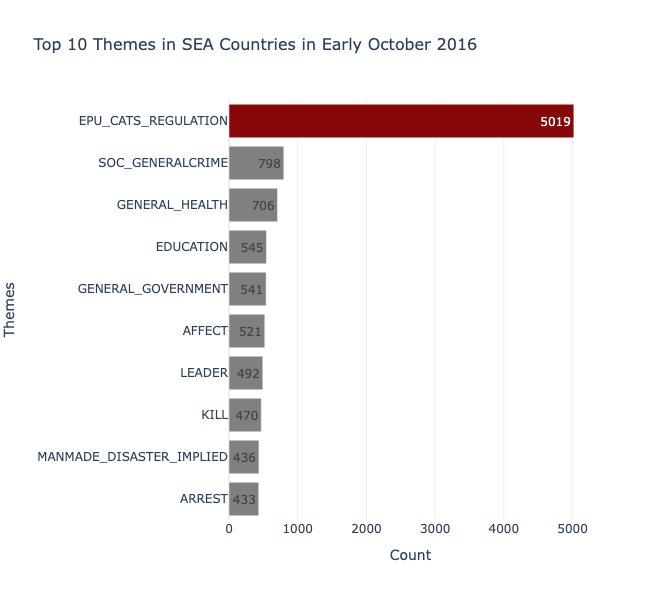

In [22]:
# Step 3: Filter the top 10 values
top_10_themes = themes_count_df.head(10)

# Step 4: Create a bar graph
# Define colors, highlighting the highest value
max_count = top_10_themes['count'].max()
colors = ['gray' if count != max_count else '#880808' for count in top_10_themes['count']]

# Initialize the figure
fig = go.Figure()

# Add a bar trace
fig.add_trace(go.Bar(
    x=top_10_themes['count'],
    y=top_10_themes['Themes_Single'],
    marker=dict(color=colors),
    text=top_10_themes['count'],
    orientation='h',
    showlegend=False
))

# Set titles and labels
fig.update_layout(
    title='Top 10 Themes in SEA Countries in Early October 2016',
    title_font_size=16,
    xaxis_title='Count',
    yaxis_title='Themes',
    yaxis=dict(categoryorder='total ascending'),
    width=800, height=600,
    template='plotly_white'
)

# Show the plot
fig.show()

For this period, `EPU_CATS_REGULATIONS` is top 1. This is about xxxx

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">more 2016 xxx</h3></center>
</div> 

In [23]:
from pyspark.sql.functions import mean
from pyspark.sql.functions import split, col

# Split the V1.5TONE column and create new columns
df_sea_ph = (df_sea_ph.withColumn(
    "overall_tone",
    split(col("`V1.5TONE`"), ",").getItem(0).cast("float")).withColumn(
        "pos_tone",
        split(col("`V1.5TONE`"), ",").getItem(1).cast("float")).withColumn(
            "neg_tone",
            split(col("`V1.5TONE`"), ",").getItem(2).cast("float")))

# Show the updated DataFrame
df_sea_ph.select("`V1.5TONE`", "overall_tone", "pos_tone",
                 "neg_tone").limit(5).toPandas()

# Group by 'Country' and calculate the mean for the specified columns
df_mean_tones = df_sea_ph.groupBy("Country").agg(
    mean("overall_tone").alias("mean_overall_tone"),
    mean("pos_tone").alias("mean_pos_tone"),
    mean("neg_tone").alias("mean_neg_tone"),
)

# Show the result
df_mean_tones.toPandas().sort_values("mean_overall_tone")

Country  mean_overall_tone  mean_pos_tone  mean_neg_tone
9   East Timor          -4.170635       2.195681       6.366316
3     Cambodia          -3.017004       3.830756       6.847760
1    Singapore          -1.949810       1.772610       3.722420
4      Myanmar          -1.841868       2.615835       4.457704
2     Malaysia          -1.811442       2.195801       4.007242
5     Thailand          -1.776880       2.288478       4.065359
0  Philippines          -1.463746       2.690077       4.153823
6    Indonesia          -1.274428       2.388204       3.662633
8         Laos          -0.595228       2.414054       3.009282
7       Brunei           0.835222       2.819048       1.983826

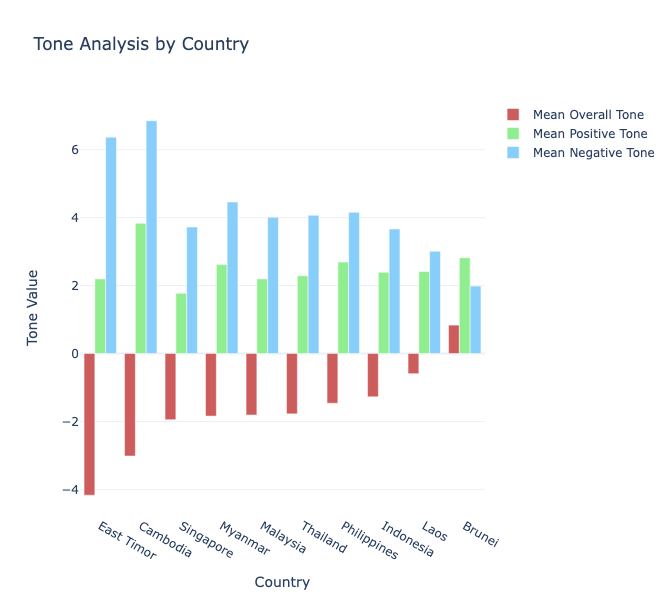

In [24]:
import plotly.graph_objects as go

# Convert the Spark DataFrame to pandas and sort by 'mean_overall_tone'
df_mean_tones_pd = df_mean_tones.toPandas().sort_values("mean_overall_tone")

# Create the figure
fig = go.Figure()

# Add traces for each tone type
fig.add_trace(go.Bar(
    x=df_mean_tones_pd['Country'],
    y=df_mean_tones_pd['mean_overall_tone'],
    name='Mean Overall Tone',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=df_mean_tones_pd['Country'],
    y=df_mean_tones_pd['mean_pos_tone'],
    name='Mean Positive Tone',
    marker_color='lightgreen'
))

fig.add_trace(go.Bar(
    x=df_mean_tones_pd['Country'],
    y=df_mean_tones_pd['mean_neg_tone'],
    name='Mean Negative Tone',
    marker_color='lightskyblue'
))

# Update layout
fig.update_layout(
    title='Tone Analysis by Country',
    xaxis_title='Country',
    yaxis_title='Tone Value',
    barmode='group',
    width=1000, height=600,
    template='plotly_white'
)

# Show the plot
fig.show()


<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">more 2016 xxx</h3></center>
</div> 

In [25]:
from pyspark.sql.functions import col, when

# Define the mapping
df_sea_ph = (df_sea_ph
          .withColumn('V2SOURCECOLLECTIONIDENTIFIER',
                      when(col('V2SOURCECOLLECTIONIDENTIFIER') == 1, 'WEB')
                      .when(col('V2SOURCECOLLECTIONIDENTIFIER') == 2, 'CITATIONONLY')
                      .when(col('V2SOURCECOLLECTIONIDENTIFIER') == 3, 'CORE')
                      .when(col('V2SOURCECOLLECTIONIDENTIFIER') == 4, 'DTIC')
                      .when(col('V2SOURCECOLLECTIONIDENTIFIER') == 5, 'JSTOR')
                      .when(col('V2SOURCECOLLECTIONIDENTIFIER') == 6, 'NONTEXTUALSOURCE')
                      .otherwise(col('V2SOURCECOLLECTIONIDENTIFIER'))))

# Show the updated DataFrame
df_sea_ph.select('V2SOURCECOLLECTIONIDENTIFIER').limit(5).toPandas()

V2SOURCECOLLECTIONIDENTIFIER
0                          WEB
1                          WEB
2                          WEB
3                          WEB
4                          WEB

In [26]:
from pyspark.sql.functions import count

df_grouped_counts = (df_sea_ph
                     .groupBy('V2SOURCECOLLECTIONIDENTIFIER', 'Country')
                     .agg(count('*').alias('category_count'))
                     .orderBy('V2SOURCECOLLECTIONIDENTIFIER', 'Country'))

# Show the result
df_grouped_counts.limit(5).toPandas()

V2SOURCECOLLECTIONIDENTIFIER      Country  category_count
0                 CITATIONONLY    Indonesia               2
1                 CITATIONONLY     Malaysia               8
2                 CITATIONONLY      Myanmar               8
3                 CITATIONONLY  Philippines               8
4                 CITATIONONLY    Singapore               1

In [27]:
from pyspark.sql.functions import col, count, max

# Filter for the Philippines
df_ph = df_sea_ph.filter(col('Country') == 'Philippines')

# Group by 'V2SOURCECOLLECTIONIDENTIFIER' and 'Themes_Single', then count each category
df_ph_counts = (df_sea_ph
                .groupBy('V2SOURCECOLLECTIONIDENTIFIER', 'Themes_Single')
                .agg(count('*').alias('theme_count')))

# Find the max theme count per 'V2SOURCECOLLECTIONIDENTIFIER'
df_ph_max_counts = (df_ph_counts
                    .groupBy('V2SOURCECOLLECTIONIDENTIFIER')
                    .agg(max('theme_count').alias('max_theme_count'))
                    .orderBy('V2SOURCECOLLECTIONIDENTIFIER'))

# Show the result
df_ph_max_counts.limit(5).toPandas()

V2SOURCECOLLECTIONIDENTIFIER  max_theme_count
0                 CITATIONONLY                5
1                          WEB             8443

In [28]:
from pyspark.sql.functions import split, regexp_extract, col, expr, array_distinct

# Split the V2ENHANCEDTHEMES column by semicolon
df_sea_ph = df_sea_ph.withColumn('Themes_split', split(col('V2ENHANCEDTHEMES'), ';'))

# Extract the words before the comma and create a new list column with unique values
df_sea_ph = df_sea_ph.withColumn(
    'Themes_list',
    array_distinct(expr("transform(Themes_split, x -> regexp_extract(x, '^(.*),', 1))"))
)

# Show the updated DataFrame
df_sea_ph.select('V2ENHANCEDTHEMES', 'Themes_list').limit(5).toPandas()

V2ENHANCEDTHEMES  \
0  DEATH_PENALTY,140;DEATH_PENALTY,220;DEATH_PENA...   
1  TAX_WORLDMAMMALS_CHEETAH,5755;CRISISLEX_T11_UP...   
2  EPU_CATS_REGULATION,268;HUMAN_TRAFFICKING,52;H...   
3  MEDIA_SOCIAL,291;AFFECT,14;AFFECT,74;AFFECT,22...   
4  TAX_FNCACT_AUTHORITIES,1037;CRISISLEX_CRISISLE...   

                                         Themes_list  
0  [DEATH_PENALTY, TRIAL, CRISISLEX_CRISISLEXREC,...  
1  [TAX_WORLDMAMMALS_CHEETAH, CRISISLEX_T11_UPDAT...  
2  [EPU_CATS_REGULATION, HUMAN_TRAFFICKING, TAX_F...  
3  [MEDIA_SOCIAL, AFFECT, CRISISLEX_CRISISLEXREC,...  
4  [TAX_FNCACT_AUTHORITIES, CRISISLEX_CRISISLEXRE...

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">more 2016 xxx</h3></center>
</div> 

In [33]:
from pyspark.sql.functions import split, col

# Create a new column with V1PERSONS as a list
df_sea_ph = df_sea_ph.withColumn('V1PERSONS_list', split(col('V1PERSONS'), ';'))

# Show the updated DataFrame
df_sea_ph.select('V1PERSONS', 'V1PERSONS_list').limit(5).toPandas()

V1PERSONS  \
0                                               None   
1  justin bieber;beth daly;gord perry;david poing...   
2                                               None   
3                                          yao huang   
4                                               None   

                                      V1PERSONS_list  
0                                               None  
1  [justin bieber, beth daly, gord perry, david p...  
2                                               None  
3                                        [yao huang]  
4                                               None

In [34]:
from pyspark.sql.functions import explode

# Explode the V1PERSONS_list column to create a row for each person
df_persons_exploded = df_sea_ph.select('V2SOURCECOLLECTIONIDENTIFIER', 'Country', 'V1PERSONS_list') \
    .withColumn('Person', explode(col('V1PERSONS_list')))

# Filter for the Philippines
df_ph_persons = df_persons_exploded.filter(col('Country') == 'Philippines')

# Group by 'Person' and count each occurrence
df_ph_persons_counts = df_ph_persons.groupBy('Person').count().orderBy('count', ascending=False)

# Show the result
df_ph_persons_counts.limit(5).toPandas()

Person  count
0  rodrigo duterte   2405
1     barack obama    481
2       abu sayyaf    437
3     adolf hitler    326
4   edgar matobato    258

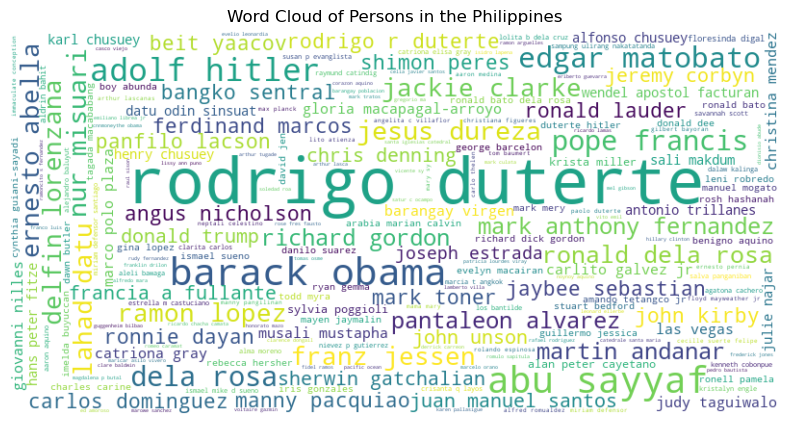

In [38]:
from pyspark.sql.functions import col, explode
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Explode the V1PERSONS_list column to create a row for each person
df_persons_exploded = df_sea_ph.select('V2SOURCECOLLECTIONIDENTIFIER', 'Country', 'V1PERSONS_list') \
    .withColumn('Person', explode(col('V1PERSONS_list')))

# Filter for the Philippines
df_ph_persons = df_persons_exploded.filter(col('Country') == 'Philippines')

# Group by 'Person' and count each occurrence
df_ph_persons_counts = df_ph_persons.groupBy('Person').count().orderBy('count', ascending=False)

# Convert to pandas DataFrame
df_ph_persons_counts_pd = df_ph_persons_counts.toPandas()

# Prepare data for word cloud
word_freq = dict(zip(df_ph_persons_counts_pd['Person'], df_ph_persons_counts_pd['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Persons in the Philippines')
plt.show()

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">more 2016 xxx</h3></center>
</div> 

In [47]:
df_ph_exploded = df_sea_ph.filter(col('Country') == 'Philippines') \
    .withColumn('Person', explode(col('V1PERSONS_list')))

# Further filter for rows where Person is 'rodrigo duterte'
df_duterte = df_ph_exploded.filter(col('Person') == 'rodrigo duterte')

# Count unique Themes_Single and filter out empty themes
df_duterte_unique_themes = df_duterte.select('Themes_list', 'Themes_Single') \
    .withColumn('Theme', explode(col('Themes_list'))) \
    .filter(col('Theme') != "") \
    .groupBy('Theme') \
    .agg(count('Themes_Single').alias('unique_themes_count'))

# Show the result
df_duterte_unique_themes.toPandas().head().sort_values('unique_themes_count', ascending=False)

Theme  unique_themes_count
0                                SOC_EXPRESSREGRET                  436
3                             TAX_ETHNICITY_JEWISH                  417
4  WB_1497_EDUCATION_MANAGEMENT_AND_ADMINISTRATION                  140
2                                 WB_2704_EMPLOYER                   57
1                                TAX_FNCACT_WARDEN                    2

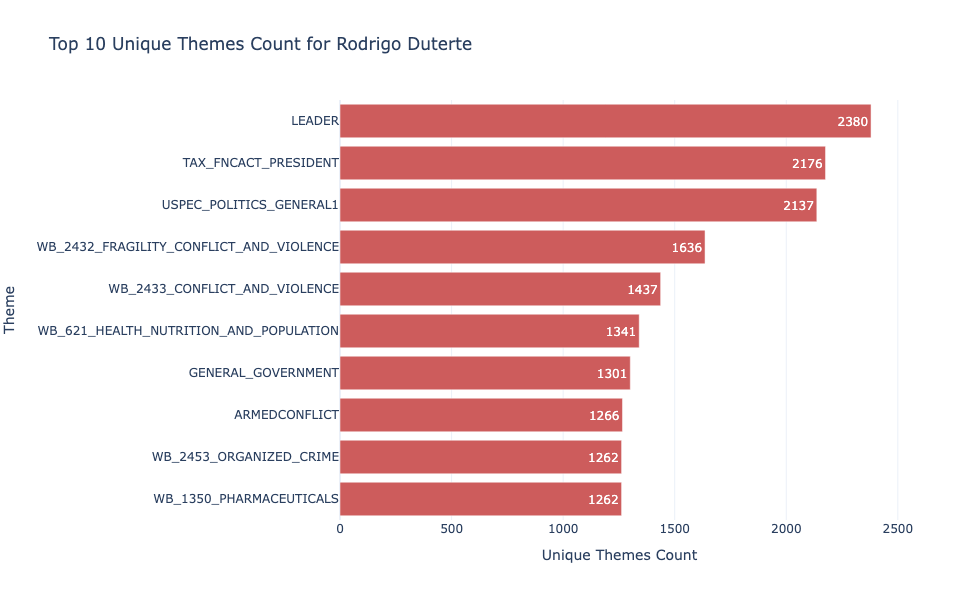

In [48]:
from pyspark.sql.functions import col, explode, count
import pandas as pd
import plotly.graph_objects as go

# Convert to pandas DataFrame and sort
df_duterte_unique_themes_pd = df_duterte_unique_themes.toPandas().sort_values('unique_themes_count', ascending=False)

# Get top 10 themes
df_duterte_top10_themes = df_duterte_unique_themes_pd.head(10)

# Initialize the figure
fig = go.Figure()

# Add a bar trace
fig.add_trace(go.Bar(
    x=df_duterte_top10_themes['unique_themes_count'],
    y=df_duterte_top10_themes['Theme'],
    orientation='h',
    marker=dict(color='indianred'),
    text=df_duterte_top10_themes['unique_themes_count']
))

# Update layout
fig.update_layout(
    title='Top 10 Unique Themes Count for Rodrigo Duterte',
    xaxis_title='Unique Themes Count',
    yaxis_title='Theme',
    yaxis=dict(categoryorder='total ascending'),  # Sort y-axis in descending order
    width=1000, height=600,
    template='plotly_white'
)

# Show the plot
fig.show()

<div style="background-color:#880808 ; padding: 10px 0;">
    <center><h5 style="color: white; font-weight:bold">more 2016 xxx</h3></center>
</div> 

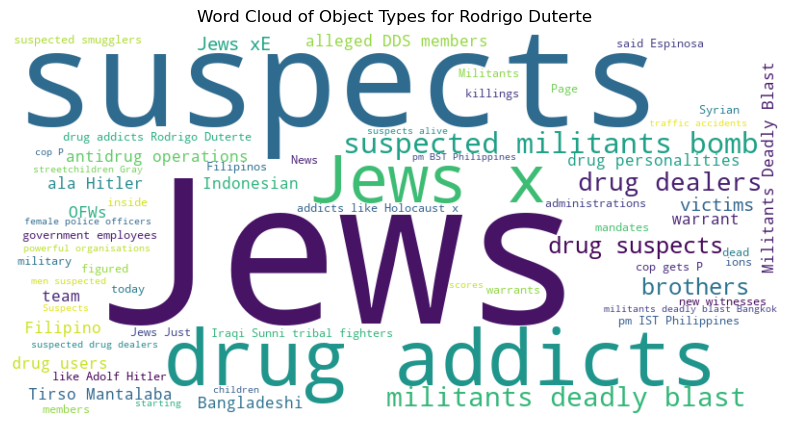

In [63]:
from pyspark.sql.functions import explode, split, col
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter for Philippines
df_ph = df_sea_ph.filter(col('Country') == 'Philippines')

# Step 2: Explode V1PERSONS_list and filter for 'rodrigo duterte'
df_ph_exploded = df_ph.withColumn('Person', explode(col('V1PERSONS_list')))
df_duterte = df_ph_exploded.filter(col('Person') == 'rodrigo duterte')

# Step 3: Extract the 3rd object from V1COUNTS as ObjectType
df_duterte = df_duterte.withColumn('ObjectType', split(col('V1COUNTS'), '#').getItem(2))

# Step 4: Group by ObjectType and count occurrences, filtering out None and empty strings
df_object_type_counts = df_duterte.filter((col('ObjectType').isNotNull()) & (col('ObjectType') != "")) \
    .groupBy('ObjectType').count().orderBy('count', ascending=False)

# Convert to pandas DataFrame
df_object_type_counts_pd = df_object_type_counts.toPandas()

# Prepare data for word cloud
word_freq = dict(zip(df_object_type_counts_pd['ObjectType'], df_object_type_counts_pd['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Object Types for Rodrigo Duterte')
plt.show()


<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RESULTS AND DISCUSSION</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RECOMMENDATIONS</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">SCOPE & LIMITATIONS</h1></center>
</div> 

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">CONCLUSION</h1></center>
</div>

<div style="background-color:#000000 ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">REFERENCES</h1></center>
</div> 

The GDELT Project. (n.d.). [Web page]. Retrieved from https://www.gdeltproject.org/

Channel News Asia. (2022). Paid troll army for hire: Philippines' social media elections influencers. [Web page]. Channel News Asia. Retrieved from https://www.channelnewsasia.com/cna-insider/paid-troll-army-hire-philippines-social-media-elections-influencers-2917556

Rappler. (n.d.). Investigating troll farms: What to look out for. [Web page]. Retrieved from https://www.rappler.com/newsbreak/iq/investigating-troll-farms-what-to-look-out-for

https://catholicphilly.com/2016/10/news/world-news/philippine-bishops-leader-in-endless-grief-over-drug-war/

<div style="background-color:BLUE ; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">SCRATCH</h1></center>
</div> 

In [1]:
import os
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
spark = (SparkSession
     .builder
     .master('local[*]') # Master URL;
     .getOrCreate())

In [3]:
from pyspark.sql.types import (StructType, StructField, StringType,
IntegerType, FloatType, TimestampType, LongType)
import glob
# Define the schema—NOT FINAL; SHOULD REVISIT
schema = StructType([
    StructField("GKGRECORDID", StringType(), True),
    StructField("V2.1DATE", LongType(), True),
    StructField("V2SOURCECOLLECTIONIDENTIFIER", IntegerType(), True),
    StructField("V2SOURCECOMMONNAME", StringType(), True),
    StructField("V2DOCUMENTIDENTIFIER", StringType(), True),
    StructField("V1COUNTS", StringType(), True),
    StructField("V2.1COUNTS", StringType(), True),
    StructField("V1THEMES", StringType(), True),
    StructField("V2ENHANCEDTHEMES", StringType(), True),
    StructField("V1LOCATIONS", StringType(), True),
    StructField("V2ENHANCEDLOCATIONS", StringType(), True),
    StructField("V1PERSONS", StringType(), True),
    StructField("V2ENHANCEDPERSONS", StringType(), True),
    StructField("V1ORGANIZATIONS", StringType(), True),
    StructField("V2ENHANCEDORGANIZATIONS", StringType(), True),
    StructField("V1.5TONE", FloatType(), True),
    StructField("V2.1ENHANCEDDATES", StringType(), True),
    StructField("V2GCAM", StringType(), True),
    StructField("V2.1SHARINGIMAGE", StringType(), True),
    StructField("V2.1RELATEDIMAGES", StringType(), True),
    StructField("V2.1SOCIALIMAGEEMBEDS", StringType(), True),
    StructField("V2.1SOCIALVIDEOEMBEDS", StringType(), True),
    StructField("V2.1QUOTATIONS", StringType(), True),
    StructField("V2.1ALLNAMES", StringType(), True),
    StructField("V2.1AMOUNTS", StringType(), True),
    StructField("V2.1TRANSLATIONINFO", StringType(), True),
    StructField("V2EXTRASXML", StringType(), True)
])

# Define the path and file patterns for the first 8 days of August 2019
path = '/mnt/data/public/gdeltv2/gkg/'
file_pattern = '2019080[1-8]*.gkg.csv'  # Matches days 01 to 08

# Use glob to list files matching the pattern
files = glob.glob(path + file_pattern)

# Read the files into a DataFrame with the specified schema
df_gkg = spark.read.csv(files, sep='\t', schema=schema)

In [4]:
row_count = df_gkg.count()

In [5]:
print(f"The dataset has {row_count} rows.")

The dataset has 1436716 rows.


This is a sample of the dataset:

In [6]:
df_gkg.limit(3).toPandas()

GKGRECORDID        V2.1DATE  V2SOURCECOLLECTIONIDENTIFIER  \
0  20190801173000-0  20190801173000                             1   
1  20190801173000-1  20190801173000                             1   
2  20190801173000-2  20190801173000                             1   

    V2SOURCECOMMONNAME                               V2DOCUMENTIDENTIFIER  \
0     newstoday.com.bd  http://www.newstoday.com.bd/?option=details&ne...   
1             idrw.org  http://idrw.org/ms-velpari-takes-over-from-sun...   
2  willistonherald.com  https://www.willistonherald.com/news/oil_and_e...   

                                            V1COUNTS  \
0                                               None   
1                                               None   
2  KILL#4000000##2#Colorado, United States#US#USC...   

                                          V2.1COUNTS  \
0                                               None   
1                                               None   
2  KILL#4000000##2#Colorado, United States#US#USC...   

                                            V1THEMES  \
0  TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_ARABIC;T...   
1  TAX_FNCACT;TAX_FNCACT_DIRECTOR;TAX_FNCACT_CHIE...   
2  WB_507_ENERGY_AND_EXTRACTIVES;WB_1702_OILFIELD...   

                                    V2ENHANCEDTHEMES  \
0  TAX_FNCACT_JUDGES,1022;MEDIA_MSM,296;SOC_SLAVE...   
1  TAX_FNCACT_CHIEF,275;EDUCATION,430;SOC_POINTSO...   
2  WB_507_ENERGY_AND_EXTRACTIVES,25;WB_1702_OILFI...   

                                         V1LOCATIONS  ...  \
0  1#Germany#GM#GM#51.5#10.5#GM;1#Chile#CI#CI#-30...  ...   
1  4#Hindustan, India (General), India#IN#IN00#28...  ...   
2  2#Colorado, United States#US#USCO#39.0646#-105...  ...   

                                              V2GCAM  \
0  wc:345,c1.1:2,c1.4:1,c12.1:29,c12.10:24,c12.12...   
1  wc:168,c12.1:6,c12.10:14,c12.12:5,c12.13:4,c12...   
2  wc:715,c1.2:6,c1.3:1,c12.1:47,c12.10:88,c12.11...   

                                    V2.1SHARINGIMAGE V2.1RELATEDIMAGES  \
0                                               None              None   
1                                               None              None   
2  https://bloximages.chicago2.vip.townnews.com/w...              None   

  V2.1SOCIALIMAGEEMBEDS                              V2.1SOCIALVIDEOEMBEDS  \
0                  None                                               None   
1                  None  https://youtube.com/channel/UChCONU0XnVC2671b7...   
2                  None  https://youtube.com/channel/UCHR2WhAPYJ6magx0g...   

                                      V2.1QUOTATIONS  \
0  1188|112||a richly imagined , engaging and poe...   
1                                               None   
2                                               None   

                                        V2.1ALLNAMES  \
0  Man Booker International,95;Edinburgh Universi...   
1  Sunil Kumar,143;Tejas Division,322;Aircraft Pr...   
2        Liberty Oilfield Services,26;Tier Four,2357   

                                         V2.1AMOUNTS V2.1TRANSLATIONINFO  \
0  2,previous collections of short,323;3,novels,3...                None   
1                                               None                None   
2  5,hydraulic fracturing fleets operating,30;23,...                None   

                                         V2EXTRASXML  
0                                               None  
1                    <PAGE_AUTHORS>By</PAGE_AUTHORS>  
2  <PAGE_AUTHORS>Ren&eacute;e Jean rjean@willisto...  

[3 rows x 27 columns]

## **How many different types of counts were made (e.g., how many arrests, protest)**?

In [33]:
# Create separate dataframes for PH and SEA countries
df_ph = (df_final
         .filter(F.col('Country').rlike('Philippines'))
        )

sea_countries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia",
                 "Myanmar", "Singapore", "Thailand", "Vietnam",
                 "East Timor"]

# Filtering the DataFrame for SEA countries
df_sea = (df_final
          .filter(F.col('Country').isin(sea_countries))
         )

In [13]:
df_final.limit(5).toPandas()

GKGRECORDID        V2.1DATE  V2SOURCECOLLECTIONIDENTIFIER  \
0  20190801173000-0  20190801173000                             1   
1  20190801173000-1  20190801173000                             1   
2  20190801173000-2  20190801173000                             1   
3  20190801173000-3  20190801173000                             1   
4  20190801173000-4  20190801173000                             1   

    V2SOURCECOMMONNAME                               V2DOCUMENTIDENTIFIER  \
0     newstoday.com.bd  http://www.newstoday.com.bd/?option=details&ne...   
1             idrw.org  http://idrw.org/ms-velpari-takes-over-from-sun...   
2  willistonherald.com  https://www.willistonherald.com/news/oil_and_e...   
3            9news.com  https://www.9news.com/article/life/style/color...   
4           aninews.in  https://www.aninews.in/news/national/general-n...   

                                            V1COUNTS  \
0                                               None   
1                                               None   
2  KILL#4000000##2#Colorado, United States#US#USC...   
3                                               None   
4                                               None   

                                          V2.1COUNTS  \
0                                               None   
1                                               None   
2  KILL#4000000##2#Colorado, United States#US#USC...   
3                                               None   
4                                               None   

                                            V1THEMES  \
0  TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_ARABIC;T...   
1  TAX_FNCACT;TAX_FNCACT_DIRECTOR;TAX_FNCACT_CHIE...   
2  WB_507_ENERGY_AND_EXTRACTIVES;WB_1702_OILFIELD...   
3  LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...   
4  GENERAL_GOVERNMENT;EPU_POLICY;EPU_POLICY_GOVER...   

                                    V2ENHANCEDTHEMES  \
0  TAX_FNCACT_JUDGES,1022;MEDIA_MSM,296;SOC_SLAVE...   
1  TAX_FNCACT_CHIEF,275;EDUCATION,430;SOC_POINTSO...   
2  WB_507_ENERGY_AND_EXTRACTIVES,25;WB_1702_OILFI...   
3  WB_137_WATER,339;LEADER,177;TAX_FNCACT_PRESIDE...   
4  GENERAL_HEALTH,232;GENERAL_HEALTH,285;GENERAL_...   

                                         V1LOCATIONS  ...  \
0  1#Germany#GM#GM#51.5#10.5#GM;1#Chile#CI#CI#-30...  ...   
1  4#Hindustan, India (General), India#IN#IN00#28...  ...   
2  2#Colorado, United States#US#USCO#39.0646#-105...  ...   
3  1#United States#US#US#39.828175#-98.5795#US;3#...  ...   
4  4#Delhi, Delhi, India#IN#IN07#28.6667#77.2167#...  ...   

                               V2.1SOCIALVIDEOEMBEDS  \
0                                               None   
1  https://youtube.com/channel/UChCONU0XnVC2671b7...   
2  https://youtube.com/channel/UCHR2WhAPYJ6magx0g...   
3  https://youtube.com/iframe_api?noext;https://y...   
4  https://youtube.com/channel/UCtFQDgA8J8_iiwc5-...   

                                      V2.1QUOTATIONS  \
0  1188|112||a richly imagined , engaging and poe...   
1                                               None   
2                                               None   
3                                               None   
4                                               None   

                                        V2.1ALLNAMES  \
0  Man Booker International,95;Edinburgh Universi...   
1  Sunil Kumar,143;Tejas Division,322;Aircraft Pr...   
2        Liberty Oilfield Services,26;Tier Four,2357   
3  United States,21;Centennial State,83;President...   
4  New Delhi,10;Lieutenant Governor Anil Baijal,1...   

                                         V2.1AMOUNTS V2.1TRANSLATIONINFO  \
0  2,previous collections of short,323;3,novels,3...                None   
1                                               None                None   
2  5,hydraulic fracturing fleets operating,30;23,...                None   
3            20,attractions #x2014,395;41,parks,952;                None   
4              5,lakh De

The final dataset with exploded count types, locations, and themes:

**Note:**
- not sure if `persist` makes the succeeding codes slower/faster but iirc it's supposed to optimize how the initial code of `df_final` is executed --> di na niya dinadaanan ulit.

In [12]:
df_final = (df_gkg
            .withColumn('CountType', F.regexp_extract('V1COUNTS', r'^([^#]+)',
                                                      1))
            .withColumn('ExpandedLocation',
                        F.explode(F.split(
                            F.regexp_extract('V1LOCATIONS', 
                                             r'(^|;)([^#]+#[^#]+#[^#]+)',
                                                   0), ";")))
            .withColumn('ExtractedLocation',
                        F.regexp_extract('ExpandedLocation',
                                         r'#([^#]+)#', 1))
            .withColumn('Region',
                        F.element_at(F.split(F.col('ExtractedLocation'),
                                             ', '), 1)) #Region: first element
            .withColumn('Country',
                        F.element_at(F.split(F.col('ExtractedLocation'),
                                             ', '), -1)) #Country: last element
            .withColumn('Region', F.when(F.col('Region') == F.col('Country'),
                                         None).otherwise(F.col('Region')))
            .withColumn('THEMES_SINGLE',
                        F.explode(F.split(F.regexp_extract('V1THEMES',
                                                           r'([^;]+)', 0),
                                          ";")))
            .drop('ExpandedLocation', 'ExtractedLocation') #Remove  columns
            # .persist()
           )


In [37]:
# Getting an error here idk why
(df_ph
 .groupBy('CountType')
 .count()
 .orderBy('count', ascending=False)
).toPandas()

Py4JJavaError: An error occurred while calling o330.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 38 in stage 21.0 failed 1 times, most recent failure: Lost task 38.0 in stage 21.0 (TID 1575) (localhost executor driver): org.apache.spark.SparkFileNotFoundException: File file:/mnt/data/public/gdeltv2/gkg/20190802154500.gkg.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:780)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:840)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkFileNotFoundException: File file:/mnt/data/public/gdeltv2/gkg/20190802154500.gkg.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:780)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:840)
